## Generating questions and answers for reaching definitions

In [1]:
import ast

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../output_data/detailed_travel_routes.csv')

df

,id,Domain,Goal,Plan,Detailed Plan
0,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[['Drive west.', 'Turn right after 582 meters ...","[[{'instruction': 'Drive west.', 'name': '-', ..."
1,1,"[[-86.44039045, 37.76657014], [-85.64796181454...","BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[['Drive south.', 'Turn right after 11 meters ...","[[{'instruction': 'Drive south.', 'name': '-',..."
2,2,"[[-90.07257594727255, 29.95639325], [-90.07819...","Saenger Theatre (New Orleans, LA) to Charity H...","[['Drive southwest on North Rampart Street.', ...",[[{'instruction': 'Drive southwest on North Ra...
3,3,"[[-74.00448291111701, 40.7135665], [-73.496747...","Surrogate's Court (New York, NY) to ST JOHN'S ...","[['Drive northeast on Elk Street.', 'Turn left...",[[{'instruction': 'Drive northeast on Elk Stre...
4,4,"[[-105.1517817, 39.95190922], [-104.8943343, 3...",CENTURA HEALTH-AVISTA ADVENTIST HOSPITAL (LOUI...,"[['Drive southeast.', 'Turn left onto Health P...","[[{'instruction': 'Drive southeast.', 'name': ..."
...,...,...,...,...,...
495,495,"[[-75.598662, 38.370412], [-76.05799123, 38.54...","Gillis-Grier House (Salisbury, MD) to ADVENTIS...","[['Drive southwest on North Division Street.',...",[[{'instruction': 'Drive southwest on North Di...
496,496,"[[-81.04407659335502, 34.00904355], [-81.04072...","Lace House (Columbia, SC) to Building at 1210-...","[['Drive north on Gadsden Street.', 'Turn righ...",[[{'instruction': 'Drive north on Gadsden Stre...
497,497,"[[-78.87293133680211, 42.8848777], [-78.497961...","Hotel Lafayette (Buffalo, NY) to US Post Offic...","[['Drive east on Clinton Street.', 'Turn left ...",[[{'instruction': 'Drive east on Clinton Stree...
498,498,"[[-83.63421550067734, 32.842396353042204], [-8...","Cowles House (Macon, GA) to Emerson-Holmes Bui...","[['Drive southeast on Bond Street.', 'Turn lef...",[[{'instruction': 'Drive southeast on Bond Str...


### Defining ground truth, interval, and question format

The following three functions MUST be kept consistent with one another

In [2]:
def format_question(row):
    # This should never hit, but alert the programmer if it does
    assert row['Interval Indices'][0] != 0, "Error: Interval is the first step of the route"

    return f"What is the time interval between performing Step {row['Interval Indices'][0]} and Step {row['Interval Indices'][1] + 1}?"

#### Parsing data into python compatible types


In [3]:
df['Domain'] = df['Domain'].apply(lambda x: ast.literal_eval(x.replace('coordinates = ', '').strip()))

df['Plan'] = df['Plan'].apply(ast.literal_eval)

df['Detailed Plan'] = df['Detailed Plan'].apply(ast.literal_eval)

In [4]:
df = df.explode(['Plan', 'Detailed Plan']).reset_index(drop=True)

df

,id,Domain,Goal,Plan,Detailed Plan
0,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '..."
1,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '..."
2,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '..."
3,1,"[[-86.44039045, 37.76657014], [-85.64796181454...","BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[Drive south., Turn right after 11 meters or 2...","[{'instruction': 'Drive south.', 'name': '-', ..."
4,1,"[[-86.44039045, 37.76657014], [-85.64796181454...","BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[Drive south., Turn right after 11 meters or 2...","[{'instruction': 'Drive south.', 'name': '-', ..."
...,...,...,...,...,...
1495,498,"[[-83.63421550067734, 32.842396353042204], [-8...","Cowles House (Macon, GA) to Emerson-Holmes Bui...","[Drive southeast on Bond Street., Turn left on...",[{'instruction': 'Drive southeast on Bond Stre...
1496,498,"[[-83.63421550067734, 32.842396353042204], [-8...","Cowles House (Macon, GA) to Emerson-Holmes Bui...","[Drive southeast on Bond Street., Turn left on...",[{'instruction': 'Drive southeast on Bond Stre...
1497,499,"[[-86.07399799465895, 33.44498587426914], [-85...","Boxwood (Talladega, AL) to First Presbyterian ...","[Drive east on North Street East/AL 77., Turn ...",[{'instruction': 'Drive east on North Street E...
1498,499,"[[-86.07399799465895, 33.44498587426914], [-85...","Boxwood (Talladega, AL) to First Presbyterian ...","[Drive east on North Street East/AL 77., Turn ...",[{'instruction': 'Drive east on North Street E...


In [5]:


def find_continuous_intervals(row):
    interval_indices = []
    interval_values = []
    start_idx = None
    low = 0
    high = 0

    for step_idx in range(len(row['Plan'])):
        detailed_step = row['Detailed Plan'][step_idx]
        if not 'has_interval' in detailed_step:
            print(f"id: {row['id']}, step_idx: {step_idx}")
        if detailed_step['has_interval']:
            # Start of a new interval
            if start_idx is None:
                start_idx = step_idx 
            low += detailed_step['interval'][0]
            high += detailed_step['interval'][1]
        else:
            # End of current interval
            if start_idx is not None:
                interval_indices.append((start_idx, step_idx - 1)) 
                interval_values.append([low, high])
                start_idx = None

    # If an interval wasn't closed, but we're done with the plan
    if start_idx is not None:
        interval_indices.append((start_idx, len(row['Plan']) - 1))
        interval_values.append([low, high])

    return (interval_indices, interval_values)

df[['Interval Indices', 'Ground Truth']] = df.apply(find_continuous_intervals, axis=1, result_type='expand')

df

,id,Domain,Goal,Plan,Detailed Plan,Interval Indices,Ground Truth
0,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '...","[(1, 1), (3, 3)]","[[76, 92], [147, 179]]"
1,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '...","[(1, 1), (3, 3)]","[[76, 92], [147, 179]]"
2,0,"[[-121.401001, 38.667599], [-121.2897144693877...","McClellan Airfield (SACRAMENTO, CA) to Hotel S...","[Drive west., Turn right after 582 meters or 7...","[{'instruction': 'Drive west.', 'name': '-', '...","[(1, 1), (3, 3)]","[[76, 92], [147, 179]]"
3,1,"[[-86.44039045, 37.76657014], [-85.64796181454...","BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[Drive south., Turn right after 11 meters or 2...","[{'instruction': 'Drive south.', 'name': '-', ...","[(1, 2)]","[[14, 17]]"
4,1,"[[-86.44039045, 37.76657014], [-85.64796181454...","BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[Drive south., Turn right after 11 meters or 2...","[{'instruction': 'Drive south.', 'name': '-', ...","[(1, 2)]","[[14, 17]]"
...,...,...,...,...,...,...,...
1495,498,"[[-83.63421550067734, 32.842396353042204], [-8...","Cowles House (Macon, GA) to Emerson-Holmes Bui...","[Drive southeast on Bond Street., Turn left on...",[{'instruction': 'Drive southeast on Bond Stre...,[],[]
1496,498,"[[-83.63421550067734, 32.842396353042204], [-8...","Cowles House (Macon, GA) to Emerson-Holmes Bui...","[Drive southeast on Bond Street., Turn left on...",[{'instruction': 'Drive southeast on Bond Stre...,[],[]
1497,499,"[[-86.07399799465895, 33.44498587426914], [-85...","Boxwood (Talladega, AL) to First Presbyterian ...","[Drive east on North Street East/AL 77., Turn ...",[{'instruction': 'Drive east on North Street E...,[],[]
1498,499,"[[-86.07399799465895, 33.44498587426914], [-85...","Boxwood (Talladega, AL) to First Presbyterian ...","[Drive east on North Street East/AL 77., Turn ...",[{'instruction': 'Drive east on North Street E...,"[(7, 7)]","[[433, 529]]"


In [6]:
df = df.explode(['Interval Indices', 'Ground Truth']).dropna(subset=['Interval Indices', 'Ground Truth']).reset_index(drop=True)

df['Step Count'] = df['Interval Indices'].apply(lambda x: x[1] - x[0] + 1)

df = df.sort_values(by=['Step Count'], ascending=False).drop_duplicates(subset=['id']).head(n=100)

df

,id,Domain,Goal,Plan,Detailed Plan,Interval Indices,Ground Truth,Step Count
689,258,"[[-96.671988, 34.805214], [-96.39342792, 34.00...","Ada Regional Airport (ADA, OK) to ALLIANCEHEAL...","[Drive southwest., Turn left onto North Broadw...","[{'instruction': 'Drive southwest.', 'name': '...","(11, 16)","[90, 110]",6
851,317,"[[-81.18909279, 41.509258], [-81.3509325552159...","UH GEAUGA MEDICAL CENTER (CHARDON, OH) to Lawn...","[Drive east., Turn left after 19 meters or 6-8...","[{'instruction': 'Drive east.', 'name': '-', '...","(1, 6)","[98, 119]",6
812,297,"[[-76.34860974477056, 39.53700665], [-76.73469...","Odd Fellows Lodge (Bel Air, MD) to Hilton (Cat...","[Drive northwest on Burns Alley., Turn left on...",[{'instruction': 'Drive northwest on Burns All...,"(18, 23)","[88, 108]",6
28,9,"[[-104.79981854750211, 41.13862745872613], [-1...","Atlas Theatre (Cheyenne, WY) to VA MEDICAL CEN...","[Drive east on East 16th Street., Turn left on...",[{'instruction': 'Drive east on East 16th Stre...,"(4, 8)","[98, 120]",5
609,226,"[[-93.64406630697232, 41.560161050000005], [-9...","Rollins, Ralph, House (Des Moines, IA) to METH...","[Drive west., Turn right after 6 meters or 2 s...","[{'instruction': 'Drive west.', 'name': '-', '...","(12, 16)","[146, 177]",5
...,...,...,...,...,...,...,...,...
227,85,"[[-79.929293293026, 32.7752809], [-79.85055352...","Heyward-Washington House (Charleston, SC) to E...","[Drive east., Turn left onto Church Street., T...","[{'instruction': 'Drive east.', 'name': '-', '...","(16, 17)","[204, 251]",2
224,84,"[[-95.83769298630664, 40.3927318121755], [-96....","New Opera House (Auburn, NE) to Lincoln Airpor...",[Drive west on Central Avenue/US 136. Continue...,[{'instruction': 'Drive west on Central Avenue...,"(15, 16)","[78, 95]",2
912,342,"[[-122.4671431631632, 47.27467172699159], [-12...","Slavonian Hall (Tacoma, WA) to FAIRFAX BEHAVIO...","[Drive east on North 30th Street., Bear right ...",[{'instruction': 'Drive east on North 30th Str...,"(11, 12)","[50, 62]",2
929,351,"[[-74.76420399096916, 40.20790232700399], [-74...","Golden Swan-True American (Trenton, NJ) to Cla...","[Drive southwest on South Warren Street., Make...",[{'instruction': 'Drive southwest on South War...,"(5, 6)","[24, 30]",2


Checking for outliers in the the number of intervals found in routes

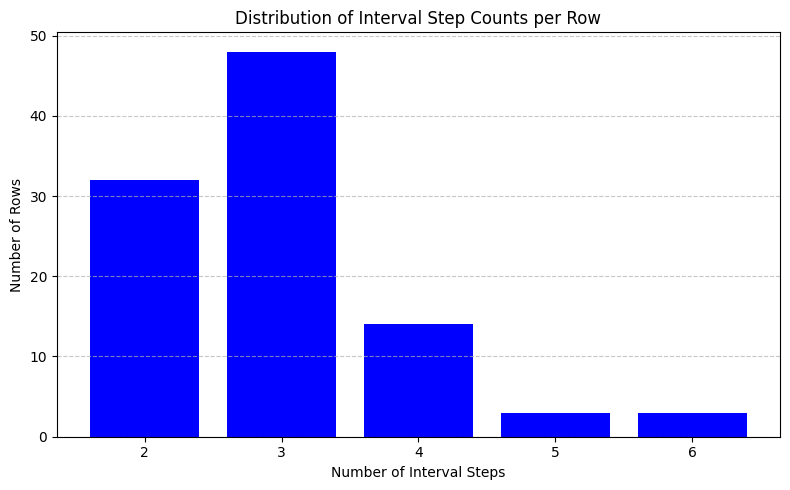

In [7]:
length_counts = df['Step Count'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(length_counts.index, length_counts.values, color='blue')
plt.xlabel('Number of Interval Steps')
plt.ylabel('Number of Rows')
plt.title('Distribution of Interval Step Counts per Row')
plt.xticks(length_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Adding ground truth and question

In [8]:
df['Question'] = df.apply(format_question, axis=1)

In [9]:
df = df[[
    'id',
    'Goal',
    'Plan',
    'Question',
    'Ground Truth',
]]

df = df.sort_values(by=['id'])

df.to_csv('../output_data/data-flow_analyses/interval_analysis.csv', index=False)

df

,id,Goal,Plan,Question,Ground Truth
7,1,"BRECKINRIDGE MEMORIAL HOSPITAL (HARDINSBURG, K...","[Drive south., Turn right after 11 meters or 2...",What is the time interval between performing S...,"[14, 17]"
14,5,SGT. JOHN L. LEVITOW VETERAN'S HEALTH CENTER (...,"[Drive north., Turn left after 42 meters or 9-...",What is the time interval between performing S...,"[33, 40]"
25,7,"MIDDLESEX HOSPITAL (MIDDLETOWN, CT) to MASONIC...","[Drive northwest., Turn right after 24 meters ...",What is the time interval between performing S...,"[44, 54]"
28,9,"Atlas Theatre (Cheyenne, WY) to VA MEDICAL CEN...","[Drive east on East 16th Street., Turn left on...",What is the time interval between performing S...,"[98, 120]"
35,15,"Boyden High School (Salisbury, NC) to Waldensi...","[Drive east on Taylor Street., Turn right onto...",What is the time interval between performing S...,"[600, 733]"
...,...,...,...,...,...
1240,470,"MILFORD REGIONAL MEDICAL CENTER (MILFORD, MA) ...","[Drive west., Turn left after 80 meters or 10-...",What is the time interval between performing S...,"[71, 87]"
1243,472,"Ramsay, Ronald and Dorcas, House (Atchison, KS...","[Drive northwest on Riverview Drive., Bear lef...",What is the time interval between performing S...,"[67, 82]"
1255,479,"SOUTH COUNTY HEALTH (WAKEFIELD, RI) to Bristol...","[Drive west., Turn left after 58 meters or 19-...",What is the time interval between performing S...,"[32, 38]"
1273,489,"BRIGHAM AND WOMEN'S HOSPITAL (BOSTON, MA) to V...","[Drive northwest., Turn left onto Binney Stree...",What is the time interval between performing S...,"[34, 41]"
